In [23]:
import os
import sys
sys.path.insert(0, os.path.abspath('utils'))
import qiskit
from qiskit.result import marginal_counts
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator # ideal simulator backend
from qiskit.visualization import plot_histogram  # to plot histograms of simulation results
import numpy as np
from collections import namedtuple
from IPython.display import display, Markdown, Latex, clear_output
import sympy as sp
from qiskit.circuit.library.standard_gates import XGate
from qiskit.circuit.library import GroverOperator, CXGate
import time
sys.path.insert(1, '../')
from utils import Helpers as hp

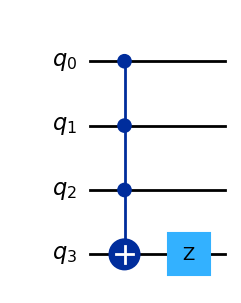

In [24]:
def oracle_for_all_one_state(n_qubits):
    qc = QuantumCircuit(n_qubits)
    qc.append(XGate().control(n_qubits - 1), list(range(n_qubits)))
    qc.z(n_qubits - 1)
    return qc

oracle_for_all_one_state(4).draw('mpl')    


In [25]:
def simulate_measure(qc, n_measure, show = False):
    idealSim=AerSimulator()
    qc = transpile(qc, idealSim)
    result=idealSim.run(qc, shots=n_measure).result()
    count = result.get_counts()
    try:
        show and display(plot_histogram(count))
    except:
        pass

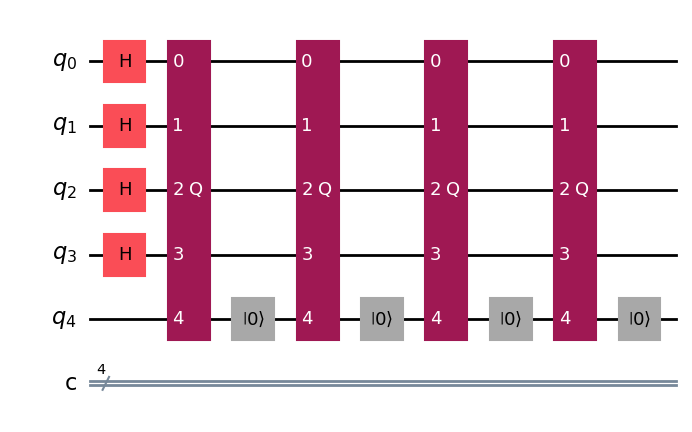

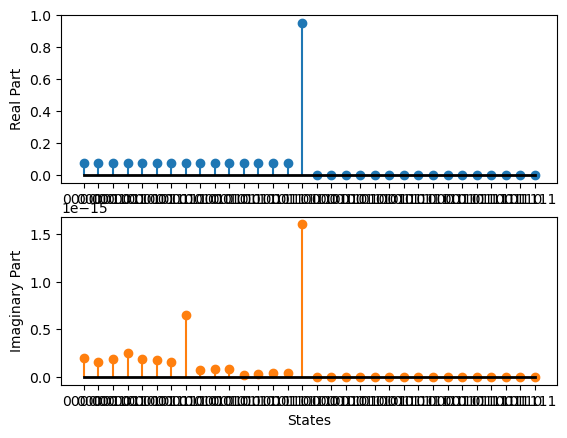

None

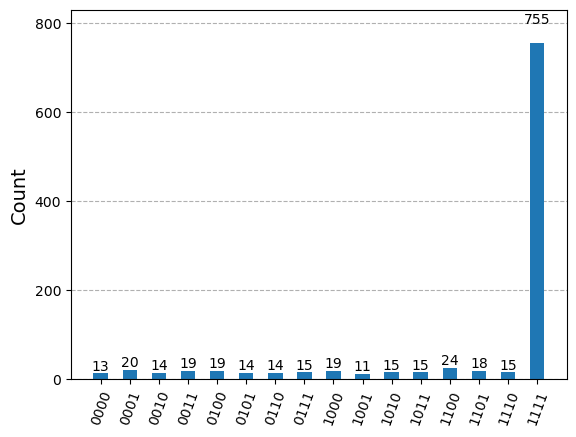

In [30]:
qubits = 5
iterations = 5
for i in range(iterations):
    qc = QuantumCircuit(qubits, qubits - 1)
    oracle = oracle_for_all_one_state(qubits)
    qc.h(range(qubits - 1))
    for _ in range(i):
        qc.append(GroverOperator(oracle), range(qubits))
        qc.reset(qubits-1)

    display(qc.draw('mpl'))

    input = Statevector.from_label('0' * qubits)
    input = input.evolve(qc)
    display(hp.plot_statevector(input, ''))

    qc.measure(range(qubits - 1), range(qubits - 1))
    simulate_measure(qc, 1000, show=True)

    time.sleep(3)
    clear_output(wait=True)

    
